<a href="https://colab.research.google.com/github/pabloezquerroo/TFG/blob/main/Maquina/Maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TFG**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator #preproceso de imagentes
from keras import optimizers #optimizador para el algoritmo
from keras.models import Sequential #redes neuronales secuenciales
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import  Convolution2D, MaxPooling2D
from keras import backend as K #si hay una sesion keras en background la mata
import os

In [3]:
K.clear_session()
data_entrenamiento= '/content/drive/MyDrive/TFG/Imágenes/Entrenamiento'
data_validacion= '/content/drive/MyDrive/TFG/Imágenes/Validacion'

def listar_contenido_directorio(ruta):
    for root, dirs, files in os.walk(ruta):
        print(f"Directorio: {root}")
        print(f"Subdirectorios: {dirs}")
        print(f"Archivos: {files}")

listar_contenido_directorio(data_entrenamiento)
listar_contenido_directorio(data_validacion)

Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento
Subdirectorios: ['Router', 'DNS', 'Link', 'Switch']
Archivos: []
Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento/Router
Subdirectorios: []
Archivos: ['r (9).png', 'r (11).png', 'r (19).png', 'r (16).png', 'r (7).png', 'r (18).png', 'r (4).png', 'r (13).png', 'r (5).png', 'r (17).png', 'r (2).png', 'r (1).png', 'r (8).png', 'r (15).png', 'r (14).png', 'r (12).png', 'r (3).png', 'r (6).png', 'r (10).png']
Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento/DNS
Subdirectorios: []
Archivos: ['d (15).png', 'd (17).png', 'd (16).png', 'd (19).png', 'd (18).png', 'd (22).png', 'd (20).png', 'd (14).png', 'd (13).png', 'd (21).png', 'd (6).png', 'd (2).png', 'd (9).png', 'd (10).png', 'd (8).png', 'd (12).png', 'd (1).png', 'd (3).png', 'd (7).png', 'd (4).png', 'd (5).png', 'd (11).png']
Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento/Link
Subdirectorios: []
Archivos: ['l (3).png', 'l (8).p

In [ ]:
# Parametros

epocas = 40 # numero de iteraciones en el set de datos
altura, longitud= 100, 100 # tamaño al que procesamos las imágenes
batch_size_entrenamiento = 82 # numero de imagenes a procesar
batch_size_validacion = 26 # numero de imagenes a procesar
pasos = 1 # numero de pasos en cada una de las epocas
pasos_validacion = 1 # numero de pasos al final de las epocas
filtrosConv1 = 32 # numero de filtros
filtrosConv2 = 64 # numero de filtros
filtrosConv3 = 64 # numero de filtros
tamano_filtro1 =(3,3)
tamano_filtro2 =(3,3)
tamano_filtro3 =(3,3)
tamano_pool = (2,2)
clases = 4 # tipos de salidas
lr = 0.0005 # como de grande van a ser los ajustes para acercarse a la solucion optima

# pre-procesamiento de imagenes

entrenamiento_datagen= ImageDataGenerator(
    rescale=1./255, # reescalamos de 0 a 1 los pixeles
    shear_range=0.3, # algunas de las imagenes las inclina
    zoom_range=0.3, # alguinas de las imagenes las amplia
    horizontal_flip = True
)

validacion_datagen = ImageDataGenerator(
    rescale = 1./255
)

imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size= (altura, longitud),
    batch_size=batch_size_entrenamiento,
    class_mode='categorical',
    color_mode='grayscale'
)

imagen_validacion = validacion_datagen.flow_from_directory(
    data_validacion,
    target_size= (altura, longitud),
    batch_size=batch_size_validacion,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 82 images belonging to 4 classes.
Found 26 images belonging to 4 classes.


In [ ]:
# Creamos la red convolucional

cnn = Sequential()

# Primera capa
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding= 'same', input_shape=(altura, longitud, 1), activation='relu'))

# Segunda capa
cnn.add(MaxPooling2D(pool_size=tamano_pool))

# Tercera capa
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding= 'same', activation='relu'))

# Cuarta capa
cnn.add(MaxPooling2D(pool_size=tamano_pool))

# Quinta capa
cnn.add(Convolution2D(filtrosConv3, tamano_filtro3, padding= 'same', activation='relu'))

# Sexta capa
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten()) # La imagen que tenemos profunda la hacemos plana, 1 dimension con toda la informacion
cnn.add(Dense(256, activation='relu')) # La imagen plana se la pasamos a una nueva capa en la que todas las neuronas estan conectadas a las de la anterior
cnn.add(Dropout(0.5)) # En cada paso de entrenamiento apagamos la mitad de las neuronas a la capa densa para evitar sobreajustar.
cnn.add(Dense(clases, activation='softmax')) # Capa final para clasificar

# Durante el entrenamiento la funcion de perdida va a ser categorical crossentropy
# Optimizador Adam
# Metrica de porcentaje para saber como de bien esta aprendiendo la red
cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=lr), metrics=['accuracy'])

# Entrenamos la red con la imagen de entrenamiento, cada epoca tiene 1000 pasos, 20 epocas.
# Despues de cada epoca va a correr 200 pasos de validacion
history = cnn.fit(
    imagen_entrenamiento,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=imagen_validacion,
    validation_steps=pasos_validacion
    )


# Guardar el modelo entrenado
# model.save('/content/drive/MyDrive/TFG/mi_modelo.h5')



Epoch 1/40
1/1 [==============================] - 10s 10s/step - loss: 1.3985 - accuracy: 0.2439 - val_loss: 1.3598 - val_accuracy: 0.3077
Epoch 2/40
1/1 [==============================] - 4s 4s/step - loss: 1.4189 - accuracy: 0.2805 - val_loss: 1.3453 - val_accuracy: 0.3077
Epoch 3/40
1/1 [==============================] - 3s 3s/step - loss: 1.3817 - accuracy: 0.3049 - val_loss: 1.3549 - val_accuracy: 0.5385
Epoch 4/40
1/1 [==============================] - 5s 5s/step - loss: 1.3787 - accuracy: 0.2927 - val_loss: 1.3565 - val_accuracy: 0.1923
Epoch 5/40
1/1 [==============================] - 4s 4s/step - loss: 1.3697 - accuracy: 0.3171 - val_loss: 1.3403 - val_accuracy: 0.6923
Epoch 6/40
1/1 [==============================] - 3s 3s/step - loss: 1.3762 - accuracy: 0.2439 - val_loss: 1.3216 - val_accuracy: 0.6154
Epoch 7/40
1/1 [==============================] - 2s 2s/step - loss: 1.3508 - accuracy: 0.3171 - val_loss: 1.3036 - val_accuracy: 0.6154
Epoch 8/40
1/1 [=======================

1/1 [==============================] - 0s 352ms/step - loss: 0.0595 - accuracy: 1.0000
Precisión en datos de validación: 1.0


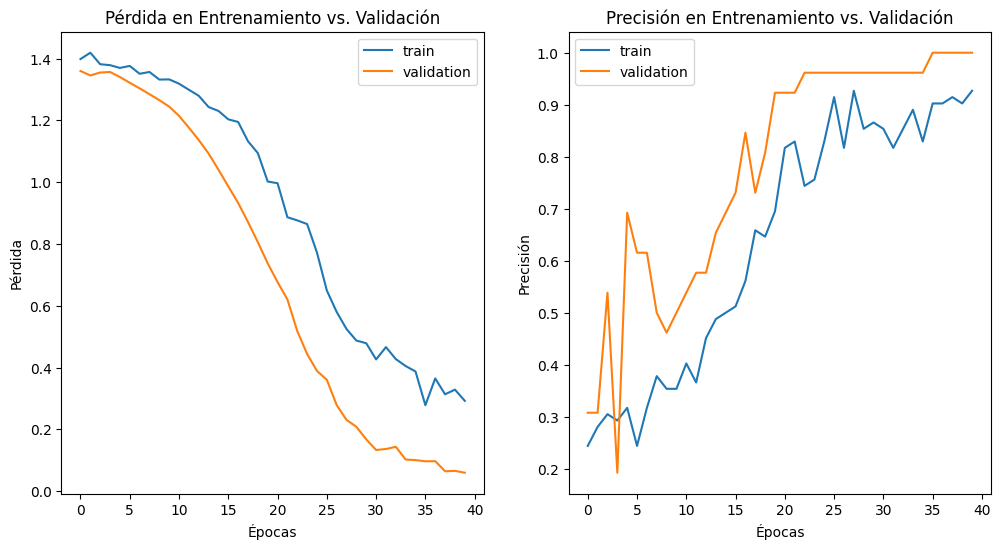

1/1 [==============================] - 1s 1s/step
Matriz de Confusión:
[[1 2 2 3]
 [2 1 0 2]
 [2 1 1 1]
 [3 1 2 2]]
Informe de Clasificación:
              precision    recall  f1-score   support

         DNS       0.12      0.12      0.12         8
        Link       0.20      0.20      0.20         5
      Router       0.20      0.20      0.20         5
      Switch       0.25      0.25      0.25         8

    accuracy                           0.19        26
   macro avg       0.19      0.19      0.19        26
weighted avg       0.19      0.19      0.19        26



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Paso 1: Calcular la precisión en datos de validación
validation_loss, validation_accuracy = cnn.evaluate(imagen_validacion)
print(f'Precisión en datos de validación: {validation_accuracy}')

# Paso 2: Graficar la curva de aprendizaje
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Pérdida en conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Pérdida en Entrenamiento vs. Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Precisión en conjunto de entrenamiento
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('Precisión en Entrenamiento vs. Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.show()

plot_learning_curve(history)

# Paso 3: Realizar predicciones en datos de validación
y_pred = cnn.predict(imagen_validacion)
y_pred_classes = np.argmax(y_pred, axis=1)

# Paso 4: Matriz de Confusión
confusion = confusion_matrix(imagen_validacion.classes, y_pred_classes)
print("Matriz de Confusión:")
print(confusion)

# Paso 5: Informe de Clasificación
class_labels = list(imagen_validacion.class_indices.keys())
print("Informe de Clasificación:")
print(classification_report(imagen_validacion.classes, y_pred_classes, target_names=class_labels))
